# CB0494: Introduction to Data Science and Artificial Intelligence
## HDB Resale Price Prediction Mini Project 

# Problem Formulation

We would like to predict whether a couple can afford a HDB flat of their liking, and in which locations can they afford one. To do this, we will use the dataset of past HDB sales to construct machine learning models to predict the sale price of a given HDB flat based on certain factors. Then, we will test these models, and show how these models can be applied to real-world cases.

Dataset used was obtained from https://data.gov.sg/dataset/resale-flat-prices.

## The Beginning

In [1]:
#Basic importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
#Checking the dataset
HDBdataset = 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
HDBdata = pd.read_csv(HDBdataset)
HDBdata.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [3]:
#To know more about the columns of the dataframe
HDBdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120824 entries, 0 to 120823
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                120824 non-null  object 
 1   town                 120824 non-null  object 
 2   flat_type            120824 non-null  object 
 3   block                120824 non-null  object 
 4   street_name          120824 non-null  object 
 5   storey_range         120824 non-null  object 
 6   floor_area_sqm       120824 non-null  float64
 7   flat_model           120824 non-null  object 
 8   lease_commence_date  120824 non-null  int64  
 9   remaining_lease      120824 non-null  object 
 10  resale_price         120824 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 10.1+ MB


### Information from the chosen dataset
- From the functions performed, we have learned that the HDB dataset consists of 120824 individual rows of datapoints
- Within those datapoints, there are 3 numeric variables (columns, which are floor_area_sqm, lease_commence_date and resale_price)
- All the other variables (month, town, flat_type etc.) are seemingly categorical

# I. Analysis with the dataset 

- In this part, we will run basic statistical analysis and visualization on the dataset's variables.
- The primary goal is to determine whether certain variables have a link with resale price, and how strong their correlations are.
- We predict that prospective HDB buyers will be most concerned with parameters such as 'town', 'storey_range', 'floor_area_sqm' and 'lease_commence_date'. As such, we will plot graphs to display the distribution of resale price with respect to these variables.

In [4]:
#Dropping all the unused variables from the main dataframe for... efficiency
HDBs=HDBdata.drop(['month','flat_model','block','street_name','remaining_lease','flat_type'],axis=1)
#Specify axis=1 to make sure that columns are being dropped instead of rows

### I.a Relation between 'town' and 'resale price'

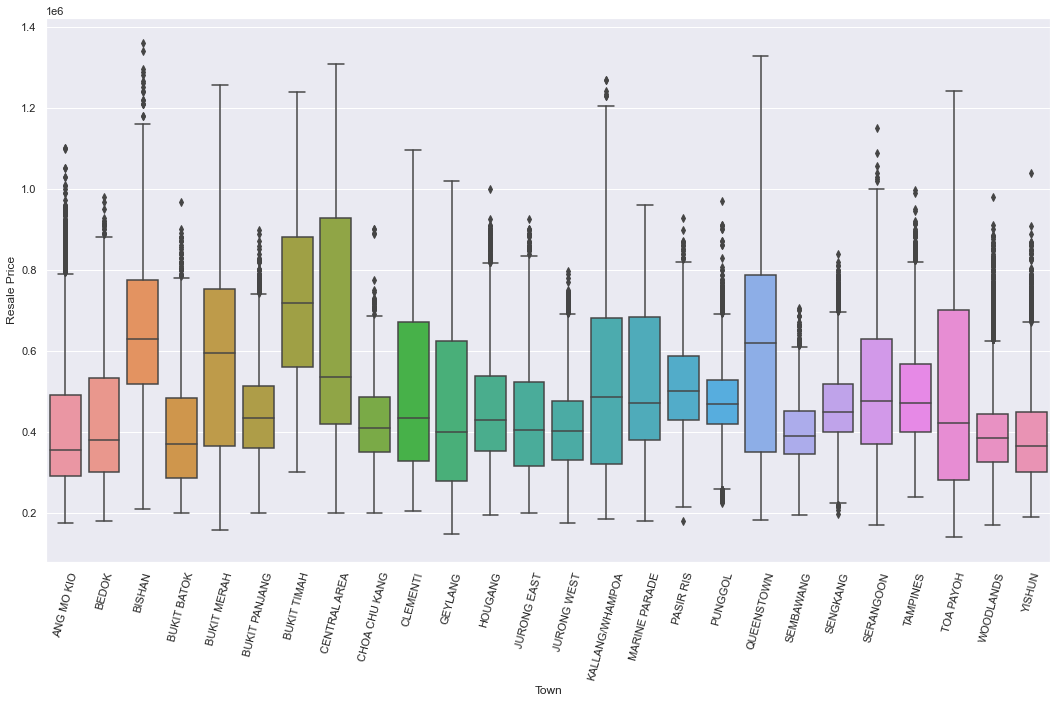

In [5]:
plt.figure(figsize=(18, 10))
sb.boxplot(x = 'town', y = 'resale_price', data = HDBs)
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.xticks(rotation=75);
#The semicolon is used to suppress the text output, which is irrelevant for our purposes

### I.b Relation between 'storey range' and 'resale price'

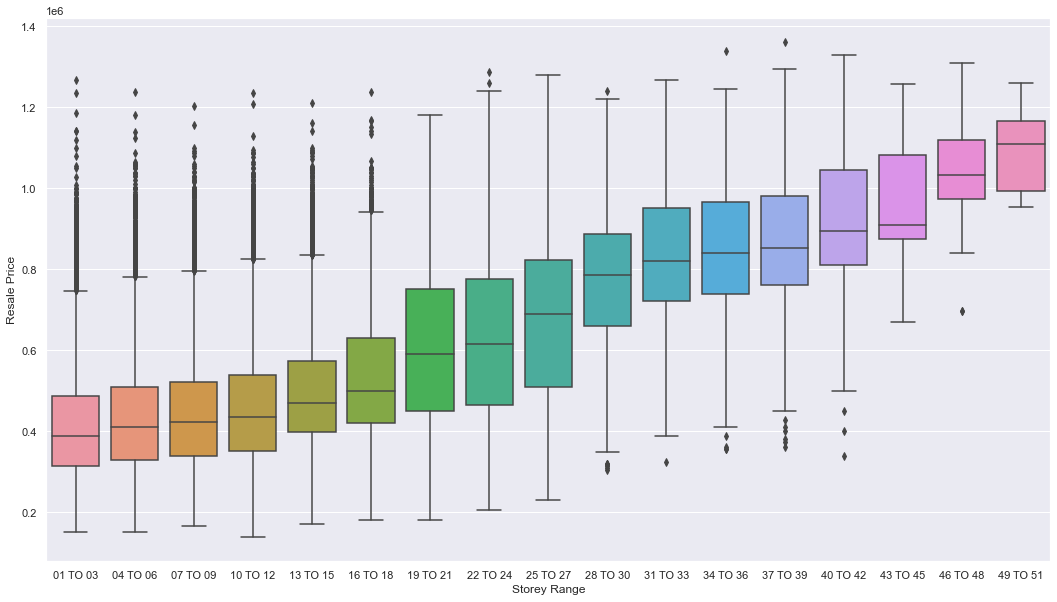

In [6]:
plt.figure(figsize=(18, 10))
sb.boxplot(x = 'storey_range', y = 'resale_price', data = HDBs, order = ["01 TO 03", "04 TO 06","07 TO 09",
"10 TO 12","13 TO 15","16 TO 18","19 TO 21", "22 TO 24","25 TO 27","28 TO 30","31 TO 33","34 TO 36","37 TO 39",
"40 TO 42","43 TO 45","46 TO 48","49 TO 51"]);
#This way of setting the order is a bit cumbersome but it suits our purposes fine
plt.xlabel('Storey Range');
plt.ylabel('Resale Price');

### I.c Relation between 'floor_area_sqm' and 'resale_price'.

                floor_area_sqm  resale_price
floor_area_sqm        1.000000      0.621364
resale_price          0.621364      1.000000


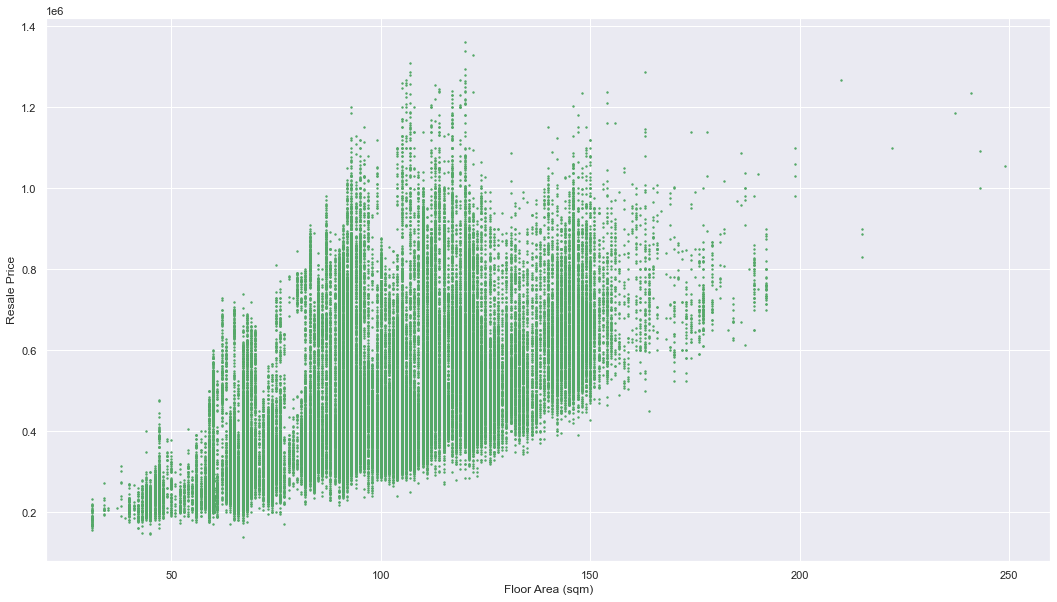

In [7]:
#As floor_area_sqm is a numeric variable, we can directly find the correlation between it and resale price
corr1=pd.DataFrame(HDBs[['floor_area_sqm','resale_price']])
print(corr1.corr())
#Fairly strong correlation between the two, which is good

plt.figure(figsize = (18, 10))
plt.scatter(x = 'floor_area_sqm', y = 'resale_price', data = corr1,s=2,color='g');
#Use s=2 to set the size of the points, lest it look like a weird shapeless blob
plt.xlabel("Floor Area (sqm)");
plt.ylabel("Resale Price");

### I.d Relation between 'lease_commence_date' and 'resale_price'.

                     lease_commence_date  resale_price
lease_commence_date             1.000000      0.350585
resale_price                    0.350585      1.000000


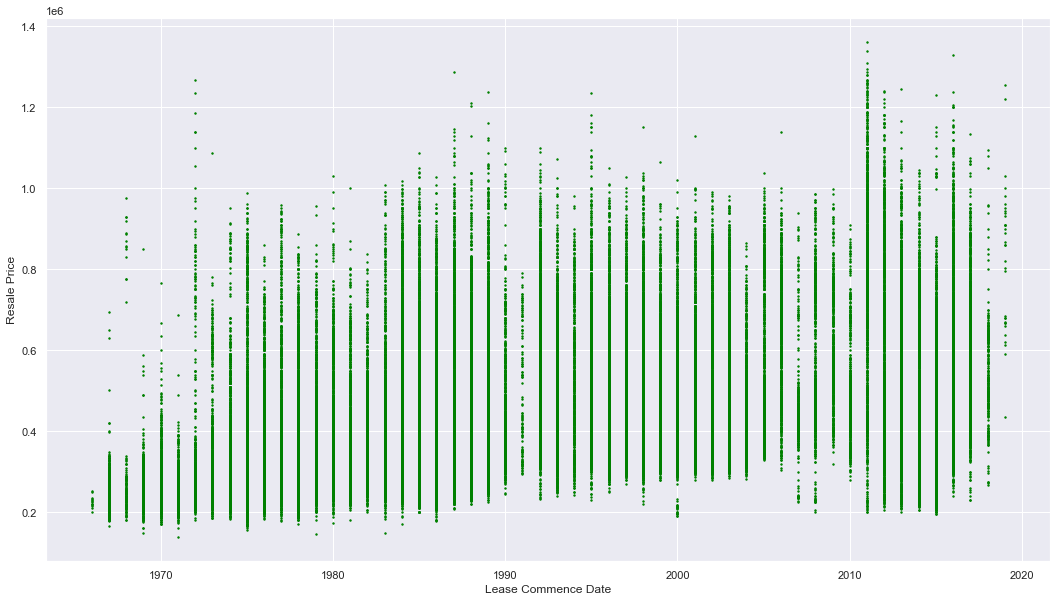

In [8]:
corr2=pd.DataFrame(HDBs[['lease_commence_date','resale_price']])
print(corr2.corr())
#Somewhat weak correlation between the two, which is fine

plt.figure(figsize = (18, 10))
plt.scatter(x = 'lease_commence_date', y = 'resale_price', data = corr2,s=2,color="green");
plt.xlabel("Lease Commence Date");
plt.ylabel("Resale Price");

### I.e Exploring the response variable - resale price 

In [9]:
# Create a dataframe for resale prices
resale_price = HDBs['resale_price']

#Finding statistics for resale price
resale_price.describe()

count    1.208240e+05
mean     4.620885e+05
std      1.598775e+05
min      1.400000e+05
25%      3.450000e+05
50%      4.300000e+05
75%      5.450000e+05
max      1.360000e+06
Name: resale_price, dtype: float64

<AxesSubplot:>

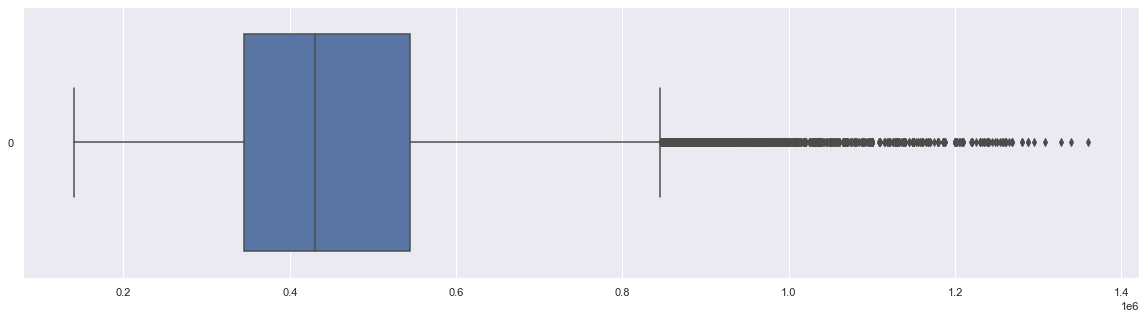

In [10]:
# Visualize distribution of resale_price using boxplot
plt.figure(figsize=[20,5])
sb.boxplot(data=resale_price, orient = "h")

### I.f Mini-conclusion
- There's a to be a weak positive correlation between 'resale_price' and 'floor_area_sqm', but a stronger positive correlation between 'resale_price' and 'lease_commence_date'.
- There also seems to be a moderately positive correlation between 'resale_price' and 'storey_range'.
- On the other hand, there seems to be a correlation between 'resale_price' and 'town', but not necessarily a linear correlation (as with the other aforementioned variables). 
- 'Resale_price' itself seems to exhibit strong tailing on the right end (towards higher resale prices), but has a relatively low mean around SGD 400k.

### I.g Problem
- As 'town' directly relates to the location of the HDB flats, we will split the dataset based by 'town' and create individual models for each town. This will help when creating models, as then we won't have to rely on one single model to predict sale prices for HDB flats in all locations around Singapore. Additionally, it is a categorical variable that cannot be easily converted or related to a numeric variable.
- On one hand, 'resale_price','floor_area_sqm' and 'lease_commence_date' are all numeric variables. Hence, using linear regression to create models to predict resale price would be ideal.
- On the other hand, 'storey_range' is a seemingly categorical variable. Hence, it would not be possible to use linear regression with it.
- Solution: convert 'storey_range' to a "numerical" variable. This will introduce some error, but also will make life a lot easier (and simpler) when building and testing the models.

# II. Data Processing

### II.a Converting 'storey_range' to a numeric variable.

Because 'storey_range' is inherently numeric (represents a range of possible values for the storey of the flat), we can just substitute it with the mean value of the range of storeys represented.

In [11]:
#First, create an array with the mean value of the storey ranges

storeyranges=HDBs['storey_range'].unique() #Finds all unique values of storey_range
meanstoreyranges=np.empty(storeyranges.size) 
#Creates empty array with the same number of values as the unique values of storey_range

#As the format of storey_range is always uniform (first 2 characters are integers, next 4 characters are irrelevant,
#last 2 characters are integers), we can exploit this to find the mean value of each value for storey_range

for n in range(0,storeyranges.size):
    meanstoreyranges[n]=(int(int(storeyranges[n][0:2])+int(storeyranges[n][6:8]))/2)
    #Standard formula to find the mean between two numbers
    #As the storey ranges are all ranges over 3 numbers (eg. 1 to 3), the mean will always be an integer
    #So, we can use int without worrying about rounding errors


#Checks
#print(storeyranges)
#print(meanstoreyranges)

In [12]:
#Then, create a dict with keys as storeyranges and values as meanstoreyranges

storeyrangeconvert=dict()
n=0
for x in storeyranges:
    storeyrangeconvert[x]=meanstoreyranges[n]
    n+=1

#Checks
print(storeyrangeconvert)

{'10 TO 12': 11.0, '01 TO 03': 2.0, '04 TO 06': 5.0, '07 TO 09': 8.0, '13 TO 15': 14.0, '19 TO 21': 20.0, '22 TO 24': 23.0, '16 TO 18': 17.0, '34 TO 36': 35.0, '28 TO 30': 29.0, '37 TO 39': 38.0, '49 TO 51': 50.0, '25 TO 27': 26.0, '40 TO 42': 41.0, '31 TO 33': 32.0, '46 TO 48': 47.0, '43 TO 45': 44.0}


In [13]:
#Then, replace "storey_range" with the mean values through the dictionary created above
#We'll also rename "storey_range" to "meanstorey"  to prevent confusion
HDBs=HDBs.replace({"storey_range":storeyrangeconvert}) 
#Replaces the values in "storey_range" (as keys) with the corresponding values in the dictionary
HDBs=HDBs.rename(columns={"storey_range":"meanstorey"})

In [14]:
#One more check to see if it worked
HDBs.head()

,town,meanstorey,floor_area_sqm,lease_commence_date,resale_price
0,ANG MO KIO,11.0,44.0,1979,232000.0
1,ANG MO KIO,2.0,67.0,1978,250000.0
2,ANG MO KIO,2.0,67.0,1980,262000.0
3,ANG MO KIO,5.0,68.0,1980,265000.0
4,ANG MO KIO,2.0,67.0,1980,265000.0


In [15]:
#Checking the correlation between meanstorey and resale_price
corr3=pd.DataFrame(HDBs[['meanstorey','resale_price']])
print(corr3.corr())
#It's also somewhat weak but it'll do

              meanstorey  resale_price
meanstorey      1.000000      0.369414
resale_price    0.369414      1.000000


### II.b Creating individual dataframes for each town.

In [16]:
#HDBdata['town'].nunique() finds number of unique category values for that column
uniquetowns=int(HDBs['town'].nunique())

#Creates array with names of each town
uniquetownnames=HDBs['town'].unique()

#Create dataframes for each town
#towndataframes is a dict with keys as scalar ints and values as dataframes containing only data from each town
#Use HDBdata['town'].unique to make sure that each dataframe created contains only one type of town 

processedtowndata=dict()
for towns in uniquetownnames:
    processedtowndata[towns]=pd.DataFrame(HDBs.loc[HDBdata['town'].str.contains(towns)])
    #Finds datapoints where the value in 'town' corresponds to the specific value in uniquetownnames
    #Then assigns them as values to the keys (towns) in processedtowndata
    #A bit complicated but it does work (check below)

In [17]:
#Check to make sure it worked
#The entire dataframe for each town should contain only datapoints with value of 'town' equal to one town
#processedtowndata['BUKIT TIMAH'].head()
processedtowndata['BUKIT TIMAH']['town'].describe()
#Shows that there's only one unique variable, which in this case is "BUKIT TIMAH"

count             329
unique              1
top       BUKIT TIMAH
freq              329
Name: town, dtype: object

# III. Creating Linear Regression Models

### III.a Splitting into train and test sets.

In [18]:
#Creating train and test sets
#Because each town has an unequal number of datapoints, use train_test_split instead of iloc for an equal distribution
#by proportion for each town dataset
from sklearn.model_selection import train_test_split

trainsets=dict()
testsets=dict()
for x in processedtowndata:
    temptrain, temptest = train_test_split(processedtowndata[x],test_size=0.75,random_state=42) 
    #Use random_state to set a "seed" to get consistent results
    trainsets[x]=temptrain
    testsets[x]=temptest

In [19]:
#More checks
trainsets['BUKIT TIMAH'].head()
#testsets['BUKIT TIMAH'].head()

,town,meanstorey,floor_area_sqm,lease_commence_date,resale_price
21833,BUKIT TIMAH,11.0,125.0,1974,870000.0
78441,BUKIT TIMAH,5.0,89.0,1974,575000.0
48962,BUKIT TIMAH,5.0,65.0,1976,375000.0
109749,BUKIT TIMAH,2.0,127.0,1988,860000.0
45353,BUKIT TIMAH,5.0,122.0,1989,805000.0


### III.b Creating Linear Regression models.

In [20]:
#Creating linear regression models
from sklearn.linear_model import LinearRegression as LR
linregmodels=dict()

#Standard dictionary assignment things
for x in trainsets:
    templrmodel=LR()
    templrmodel.fit(trainsets[x][['meanstorey','floor_area_sqm','lease_commence_date']],trainsets[x][['resale_price']])
    linregmodels[x]=templrmodel

### III.c Testing the created Linear Regression models.

In [21]:
#Testing linear regression models
trainscores=list()
testscores=list()

#Using lists instead this time because it's only one numeric variable (instead of entire lists/other data classes)
#and lists are a lot easier to understand
for x in linregmodels:
    trainscores.append(linregmodels[x].score(trainsets[x][['meanstorey','floor_area_sqm','lease_commence_date']],
                                             trainsets[x][['resale_price']]))
    testscores.append(linregmodels[x].score(testsets[x][['meanstorey','floor_area_sqm','lease_commence_date']],
                                            testsets[x][['resale_price']]))

### III.d Performing some basic data processing and visualization on the results.

In [22]:
#Have to convert the lists to dataframes first before visualizing them

#Need to convert the town names to a list to create a dataframe, as the scores are in lists
townnamelist=uniquetownnames.tolist() 

scoresdf=pd.DataFrame(data=(townnamelist,trainscores,testscores)) 
#This results in them being aligned along axis=0 (aka. rows), so we have to transpose them
scoresdf=scoresdf.transpose()
scoresdf.columns=["Towns","Train Scores","Test Scores"] #Renaming columns
scoresdf

,Towns,Train Scores,Test Scores
0,ANG MO KIO,0.924479,0.922803
1,BEDOK,0.872216,0.875261
2,BISHAN,0.859901,0.853485
3,BUKIT BATOK,0.872119,0.856646
4,BUKIT MERAH,0.879434,0.872673
5,BUKIT PANJANG,0.714824,0.72178
6,BUKIT TIMAH,0.935601,0.932281
7,CENTRAL AREA,0.894788,0.895577
8,CHOA CHU KANG,0.653739,0.663939
9,CLEMENTI,0.913081,0.91043


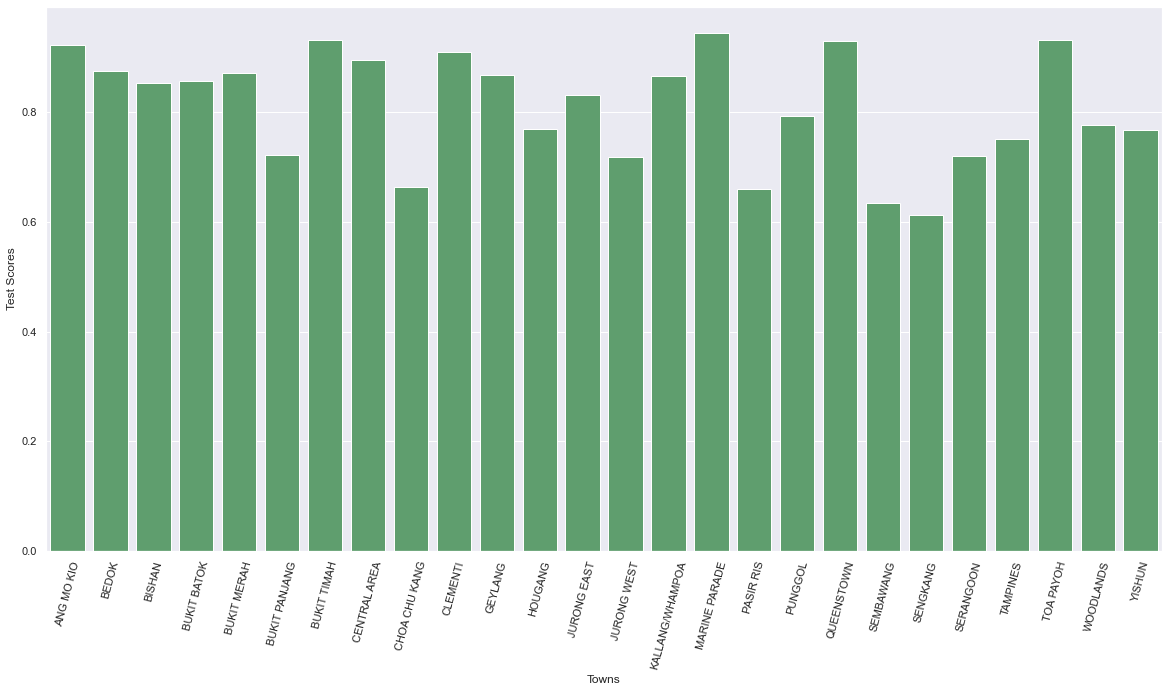

In [23]:
#Visualizing scores as bar charts
#Use the commented-out code to display the bar charts of raw scores for train set 
#f,axes=plt.subplots(2,1,figsize=(15,5))
#scoresdf.plot(x="Towns",y="Train Scores",kind="bar",ax=axes[0],color='r',sharex=True)

plt.figure(figsize=(20,10))
sb.barplot(x="Towns",y="Test Scores",data=scoresdf,color="g")
plt.xticks(rotation=75);

# IV. Use of these models

### IV.a Creating a system to predict resale price based on certain input variables

In [24]:
#Defining input variables
#These would be the variables that prospective HDB buyers provide as their ideal HDB criteria
Floor_Area='50'
Lease_Commence_Date='2000'
Storey='10'
Monthly_Income_Total='5000'

In [25]:
#Prediction of resale price based on the input variables
predictedprices=list() #Predicted prices for each town will be stored here
inputs=pd.DataFrame(data=[Storey,Floor_Area,Lease_Commence_Date]).transpose()
#To be honest, I've no clue why it's this picky in terms of inputs, but this works?
#Basically this just creates a dataframe with the inputs as columns in a single row

for x in linregmodels:
    predictedprices.append(linregmodels[x].predict(inputs))

### IV.b Utilizing the predicted resale prices

To use these predicted resale prices, we'll first make some assumptions:
- Buyers are couples who both work and earn equal amounts.
- They have enough savings to cover the downpayment (15% of resale price)
- The remaining sum will be paid off through a HDB loan (85% of resale price)
- The HDB loan will be paid off over 25 years, with an interest rate of 2.6% per year
- The household incomes and monthly instalment are assumed to stay stagnant over the entire loan period
- To be eligible for the HDB loan, 30% of the combined monthly income must be equal to or greater than the monthly instalment
- If the buyer is not eligible for the HDB loan, they cannot afford the resale flat

https://www.hdb.gov.sg/residential/buying-a-flat/resale/financing/financing-your-flat-purchase

https://www.hdb.gov.sg/residential/servicing-your-hdb-housing-loan/loan-matters/interest-rate

In [26]:
#Converting resale prices to total costs over time, then converting that to monthly instalments, and finally
#determining the minimum monthly income required to service those instalments
totalcosts=list()
monthlycosts=list()
minmonthlyincome=list()
#Using lists because they're simple

for x in range(0,uniquetowns):
    totalcosts.append((float(predictedprices[x])*0.85)*(1.026**25)) #** raises the number to the power of the 2nd number
    monthlycosts.append(totalcosts[x]/(12*25)) 
    minmonthlyincome.append(monthlycosts[x]*10/3)

In [27]:
#Create dict with quintiles of average monthly household income assuming 2 contributing members
#These were obtained from https://tablebuilder.singstat.gov.sg/table/TS/M810361
monthlyincomes={'1': float(Monthly_Income_Total), '2': float(2448),'3': float(4422),'4': float(6694),
                      '5': float(10288),'6': float(27252)}
#Curly brackets to create a dict

In [28]:
#Check if monthly income is sufficient to cover the loan repayment
#Also check to see what proportion of hypothetical couples can afford the resale flat
#Start by creating a dictionary of lists (for each buyer type)
buyercheck=list()
firstquintile=list()
secondquintile=list()
thirdquintile=list()
fourthquintile=list()
fifthquintile=list()
checks={'1':buyercheck, '2':firstquintile, '3':secondquintile, '4':thirdquintile, '5':fourthquintile, '6':fifthquintile}

#Fill those lists with checks for affordability
for x in range(0,uniquetowns):
    for n in checks:
        if minmonthlyincome[x] > monthlyincomes[n]: 
            #If the minimum monthly income required is greater than the monthly incomes, they can't afford the flat
            checks[n].append('Not Affordable')
        else:
            #Otherwise, they can afford the flat
            checks[n].append('Affordable')

In [29]:
#Converting these checks (and the minimum monthly income requirement) to a dataframe
incomechecks=pd.DataFrame(data=(minmonthlyincome,checks['1'],checks['2'],checks['3'],checks['4'],
                                checks['5'],checks['6']))
incomechecks=incomechecks.transpose()
incomechecks.columns=['Min Monthly Income Required','Can the buyer afford it?','Can the first quintile afford it?',
                     'Can the second quintile afford it?','Can the third quintile afford it?',
                      'Can the fourth quintile afford it?','Can the fifth quintile afford it?']

#Instead of adding a column with the town names, this renames the indexes based on the towns
#Means we can plot it more easily in the future
incomechecks.index=townnamelist 
incomechecks

,Min Monthly Income Required,Can the buyer afford it?,Can the first quintile afford it?,Can the second quintile afford it?,Can the third quintile afford it?,Can the fourth quintile afford it?,Can the fifth quintile afford it?
ANG MO KIO,6226.792217,Not Affordable,Not Affordable,Not Affordable,Affordable,Affordable,Affordable
BEDOK,6401.220915,Not Affordable,Not Affordable,Not Affordable,Affordable,Affordable,Affordable
BISHAN,6983.408836,Not Affordable,Not Affordable,Not Affordable,Not Affordable,Affordable,Affordable
BUKIT BATOK,4649.331151,Affordable,Not Affordable,Not Affordable,Affordable,Affordable,Affordable
BUKIT MERAH,7575.405232,Not Affordable,Not Affordable,Not Affordable,Not Affordable,Affordable,Affordable
BUKIT PANJANG,3568.291165,Affordable,Not Affordable,Affordable,Affordable,Affordable,Affordable
BUKIT TIMAH,4522.670346,Affordable,Not Affordable,Not Affordable,Affordable,Affordable,Affordable
CENTRAL AREA,9789.520148,Not Affordable,Not Affordable,Not Affordable,Not Affordable,Affordable,Affordable
CHOA CHU KANG,3602.091679,Affordable,Not Affordable,Affordable,Affordable,Affordable,Affordable
CLEMENTI,6335.489605,Not Affordable,Not Affordable,Not Affordable,Affordable,Affordable,Affordable


### IV.c Visualizing this information

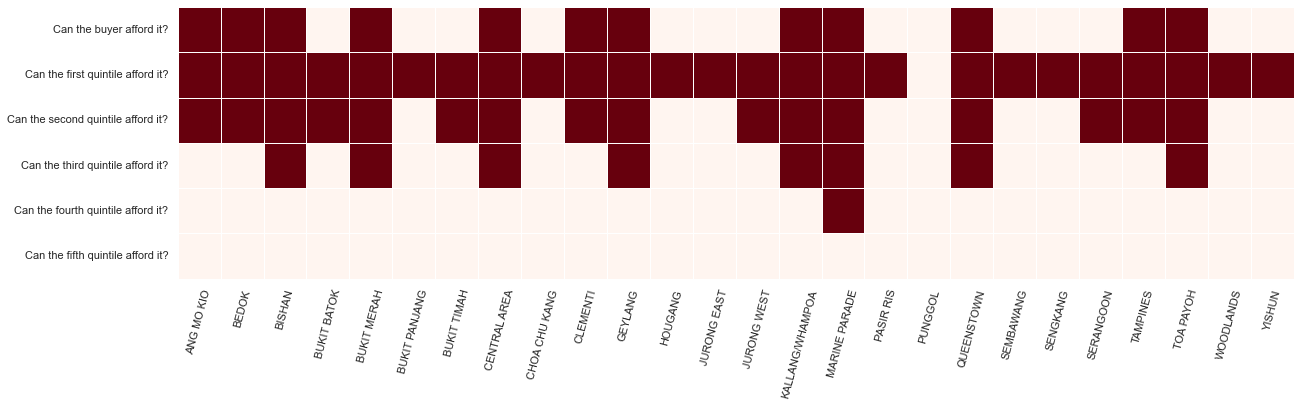

In [30]:
#The dataframe a very intuitive way of displaying the info, so let's do so with a heatmap
#It seems like the best way to do so is with another plugin/addon called bokeh, but I guess that's not available :(
incomechecksheatdf=incomechecks.drop(['Min Monthly Income Required'],axis=1)
incomechecksheatdf=incomechecksheatdf.transpose()
#Swap rows and columns, so that it's long instead of tall (fits better on the screen?)

#Create a dictionary to map "Affordable" and "Not Affordable" as binary values
affordmap={'Affordable':0,'Not Affordable':1}

#Plot figure
plt.figure(figsize=[20,5])
sb.heatmap(data=incomechecksheatdf.replace(affordmap),cmap='Reds',linewidths=1,cbar=False)
plt.xticks(rotation=75);
#Dark: not affordable, light: affordable

# V. Conclusion

In conclusion, we have created multivariate linear regression models to predict the value of 'resale_price' based on 'floor_sqr_area', 'meanstoreyrange' and 'lease_commence_date'. We have then applied these models to determine the predicted affordability of HDB flats that fit that criteria in various locations around Singapore for prospective buyers. Future extensions to this work could include utilizing more variables in prediction (through dummy encoding or switching to classification), building models for other types of living accomodation in Singapore, or by more accurately determining the affordability of the HDB flats instead of relying on the assumptions we have made.